In [85]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [86]:
df_conners = pd.read_csv('Data/df_connors', index_col=[0])
df_behavioral = pd.read_csv('Data/df_behavioral', index_col=[0])
df_eeg = pd.read_csv('Data/df_eeg', index_col=[0])
df_analysis = pd.read_csv('Data/df_analysis', index_col=[0])
print(df_conners.dtypes)
print(df_behavioral.dtypes)
print(df_eeg.dtypes)


id          int64
Gender      int64
cIM       float64
cHR       float64
cIE       float64
cSC       float64
dtype: object
id           int64
Gender       int64
Aqtot      float64
Aqaudi     float64
Aqvis      float64
RCQtot     float64
RCQaudi    float64
RCQvis     float64
dtype: object
id                     int64
Gender                 int64
adhdtype               int64
brain_oscillation     object
electrode             object
fft_abs_power        float64
dtype: object


We can observe that ids and Gender are considered as integers so we need to re-adjust for all three dframes

In [87]:
df_conners['id'] = df_conners['id'].apply(str)
df_conners['Gender'] = df_conners['Gender'].apply(str)
df_behavioral['id'] = df_behavioral['id'].apply(str)
df_behavioral['Gender'] = df_behavioral['Gender'].apply(str)
df_eeg['id'] = df_eeg['id'].apply(str)
df_eeg['Gender'] = df_eeg['Gender'].apply(str)
df_analysis['Gender'] = df_analysis['Gender'].apply(str)
print(df_conners.dtypes)
print(df_behavioral.dtypes)
print(df_eeg.dtypes)

id         object
Gender     object
cIM       float64
cHR       float64
cIE       float64
cSC       float64
dtype: object
id          object
Gender      object
Aqtot      float64
Aqaudi     float64
Aqvis      float64
RCQtot     float64
RCQaudi    float64
RCQvis     float64
dtype: object
id                    object
Gender                object
adhdtype               int64
brain_oscillation     object
electrode             object
fft_abs_power        float64
dtype: object


### First, let's look at our Conners data 

In [88]:
df_conners

,id,Gender,cIM,cHR,cIE,cSC
0,1,1,17.0,31.0,29.0,9.0
54,1,1,17.0,31.0,29.0,9.0
53,1,1,17.0,31.0,29.0,9.0
52,1,1,17.0,31.0,29.0,9.0
51,1,1,17.0,31.0,29.0,9.0
...,...,...,...,...,...,...
5798,702,1,17.0,14.0,10.0,9.0
5797,702,1,17.0,14.0,10.0,9.0
5796,702,1,17.0,14.0,10.0,9.0
5803,702,1,17.0,14.0,10.0,9.0


In [89]:
df_conners.describe()

,cIM,cHR,cIE,cSC
count,7296.000000,7296.000000,7296.000000,7296.000000
mean,21.843750,17.687500,14.479167,9.645833
std,6.660862,7.607142,6.978090,4.240424
min,5.000000,3.000000,2.000000,0.000000
25%,18.000000,12.750000,8.750000,7.000000
50%,23.000000,17.000000,15.000000,10.000000
75%,26.250000,24.000000,18.000000,12.000000
max,33.000000,33.000000,30.000000,18.000000


In [90]:
df_conners.groupby(['Gender']).describe()

cIM                                                       cHR  \
         count       mean       std  min   25%   50%   75%   max   count   
Gender                                                                     
1       4332.0  22.701754  5.620054  8.0  19.0  23.0  27.0  32.0  4332.0   
2       2964.0  20.589744  7.772784  5.0  15.0  21.0  26.0  33.0  2964.0   

                   ...   cIE           cSC                                 \
             mean  ...   75%   max   count       mean       std  min  25%   
Gender             ...                                                      
1       15.122807  ...  20.0  30.0  4332.0  11.245614  4.079862  1.0  9.0   
2       21.435897  ...  17.0  30.0  2964.0   7.307692  3.275585  0.0  5.0   

                          
         50%   75%   max  
Gender                    
1       12.0  15.0  18.0  
2        8.0  10.0  12.0  

[2 rows x 32 columns]

### Now, let's look at our behavioral data

In [91]:
df_behavioral

,id,Gender,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
0,1,1,90.0,91.0,92.0,94.0,80.0,110.0
54,1,1,90.0,91.0,92.0,94.0,80.0,110.0
53,1,1,90.0,91.0,92.0,94.0,80.0,110.0
52,1,1,90.0,91.0,92.0,94.0,80.0,110.0
51,1,1,90.0,91.0,92.0,94.0,80.0,110.0
...,...,...,...,...,...,...,...,...
5798,702,1,91.0,88.0,95.0,94.0,87.0,104.0
5797,702,1,91.0,88.0,95.0,94.0,87.0,104.0
5796,702,1,91.0,88.0,95.0,94.0,87.0,104.0
5803,702,1,91.0,88.0,95.0,94.0,87.0,104.0


In [92]:
df_behavioral.describe()

,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
count,7296.000000,7296.000000,7296.000000,7296.000000,7296.000000,7296.000000
mean,81.489583,83.479167,83.302083,71.729167,76.593750,73.614583
std,26.036215,25.061637,27.711374,24.842646,22.466595,24.463113
min,0.000000,0.000000,0.000000,16.000000,19.000000,8.000000
25%,70.500000,73.750000,69.750000,55.750000,60.000000,55.750000
50%,86.500000,89.000000,89.500000,70.500000,79.500000,73.500000
75%,101.000000,100.250000,104.250000,92.250000,92.500000,94.000000
max,125.000000,127.000000,121.000000,125.000000,132.000000,122.000000


In [93]:
df_behavioral.groupby(['Gender']).describe()

Aqtot                                                        Aqaudi  \
         count       mean        std   min   25%   50%    75%    max   count   
Gender                                                                         
1       4332.0  82.350877  24.644481   0.0  74.0  88.0  101.0  116.0  4332.0   
2       2964.0  80.230769  27.902379  21.0  61.0  83.0  101.0  125.0  2964.0   

                   ... RCQaudi         RCQvis                              \
             mean  ...     75%    max   count       mean        std   min   
Gender             ...                                                      
1       83.122807  ...    90.0  122.0  4332.0  74.614035  24.245543  33.0   
2       84.000000  ...    97.0  132.0  2964.0  72.153846  24.709134   8.0   

                                 
         25%   50%   75%    max  
Gender                           
1       56.0  67.0  94.0  122.0  
2       55.0  75.0  93.0  111.0  

[2 rows x 48 columns]

### Finally, let's look at our EEG data

In [94]:
df_eeg

,id,Gender,adhdtype,brain_oscillation,electrode,fft_abs_power
0,1,1,2,Delta,FP1,15.376173
54,1,1,2,Delta,FP2,16.585338
53,1,1,2,Delta,F7,7.968847
52,1,1,2,Delta,F3,9.749313
51,1,1,2,Delta,Fz,10.845292
...,...,...,...,...,...,...
5798,702,1,1,Beta,T6,10.614643
5797,702,1,1,Beta,O1,17.656688
5796,702,1,1,Beta,O2,16.284646
5803,702,1,1,Beta,FP2,8.058151


In [95]:
df_eeg.describe()

,adhdtype,fft_abs_power
count,7296.000000,7296.000000
mean,1.458333,11.396554
std,0.538489,11.859073
min,0.000000,0.818976
25%,1.000000,5.247675
50%,1.000000,8.486325
75%,2.000000,13.742931
max,2.000000,258.114724


In [96]:
df_eeg.groupby(['brain_oscillation', 'electrode']).describe()

adhdtype                                          \
                               count      mean       std  min  25%  50%  75%   
brain_oscillation electrode                                                    
Alpha             C3            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  C4            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  Cz            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  F3            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  F4            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
...                              ...       ...       ...  ...  ...  ...  ...   
Theta             Pz            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  T3            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  T4            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  T5            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   
                  T6            96.0  1.458333  0.541279  0.0  1.0  1.0  2.0   

                                 fft_abs_power                        \
                             max         count       mean        std   
brain_oscillation electrode                                            
Alpha             C3         2.0          96.0  14.816227  17.001913   
                  C4         2.0          96.0  14.669763  17.248843   
                  Cz         2.0          96.0  15.586763  13.987136   
                  F3         2.0          96.0   9.097565   7.023224   
                  F4         2.0          96.0   9.420172   7.477010   
...                          ...           ...        ...        ...   
Theta             Pz         2.0          96.0  13.214703  10.196196   
                  T3         2.0          96.0   4.926751   2.438685   
                  T4         2.0          96.0   4.606512   2.811496   
                  T5         2.0          96.0   7.401085   5.304542   
                  T6         2.0          96.0   7.479236   6.146453   

                                                                       \
                                  min       25%        50%        75%   
brain_oscillation electrode                                             
Alpha             C3         1.640155  4.807546   9.676305  19.787348   
                  C4         1.663464  4.967679  10.315598  18.882731   
                  Cz         2.082466  5.636457   9.985657  21.059070   
                  F3         1.411774  4.127160   7.111640  12.498701   
                  F4         1.525239  4.126991   7.350092  12.511781   
...                               ...       ...        ...        ...   
Theta             Pz         3.063776  7.128709  10.451407  16.044085   
                  T3         1.348965  3.158237   4.587008   6.048268   
                  T4         1.270426  2.903782   4.095120   5.388330   
                  T5         1.515561  4.096981   5.933580   9.095018   
                  T6         1.504450  4.010882   5.795402   8.583667   

                                         
                                    max  
brain_oscillation electrode              
Alpha             C3         132.931736  
                  C4         139.567341  
                  Cz          73.813547  
                  F3          43.748667  
                  F4          48.174317  
...                                 ...  
Theta             Pz          75.112935  
                  T3          15.712028  
                  T4          21.130068  
                  T5          34.811888  
                  T6          47.399760  

[76 rows x 16 columns]

In [97]:
# Let's also look ar our EEG absolute power mean for each of the 4 wavebands
df_eeg.groupby(['brain_oscillation']).describe()

adhdtype                                             \
                     count      mean     std  min  25%  50%  75%  max   
brain_oscillation                                                       
Alpha               1824.0  1.458333  0.5386  0.0  1.0  1.0  2.0  2.0   
Beta                1824.0  1.458333  0.5386  0.0  1.0  1.0  2.0  2.0   
Delta               1824.0  1.458333  0.5386  0.0  1.0  1.0  2.0  2.0   
Theta               1824.0  1.458333  0.5386  0.0  1.0  1.0  2.0  2.0   

                  fft_abs_power                                            \
                          count       mean        std       min       25%   
brain_oscillation                                                           
Alpha                    1824.0  13.510130  19.448280  0.818976  3.836552   
Beta                     1824.0   9.953982   8.614105  1.319401  5.128904   
Delta                    1824.0  13.124887   7.151613  2.363218  8.232837   
Theta                    1824.0   8.997216   6.625504  1.270426  4.744958   

                                                     
                         50%        75%         max  
brain_oscillation                                    
Alpha               7.152935  14.909275  258.114724  
Beta                7.700207  12.126437  120.919824  
Delta              11.709032  16.450285   83.603697  
Theta               7.298007  11.014870   75.112935

### We've looked at our means, counts, standard deviations, now let's visualize our distributions and measure their normality

#### Normality is measured using the Shapiro-Wilk test. If the returned value has a p < 0,05; the null hypothesis is rejected, pointing towards a non-normal distribution 
#### Let's start with the Connors dataset

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9636342525482178, 2.50556929836056e-39)

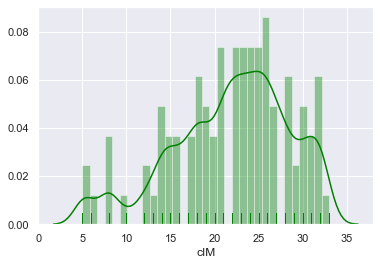

In [98]:
# Plot distribution
sns.distplot(df_conners['cIM'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cIM'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9744826555252075, 3.754574644685725e-34)

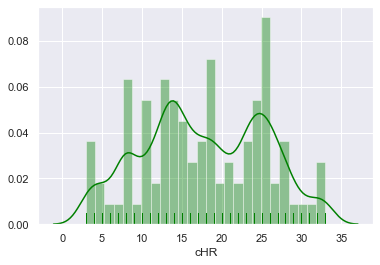

In [99]:
# Plot distribution
sns.distplot(df_conners['cHR'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cHR'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9720873832702637, 1.994776461682145e-35)

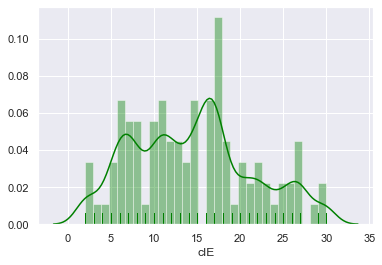

In [100]:
# Plot distribution
sns.distplot(df_conners['cIE'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cIE'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9808207154273987, 2.9404705305593402e-30)

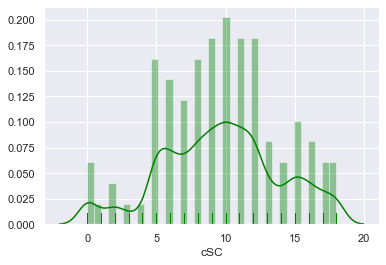

In [101]:
# Plot distribution
sns.distplot(df_conners['cSC'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cSC'])

#### As we can see, half of our conners data is normally distributed, half is not. 
#### Now, let's look at it for our behavioral measure

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.936276376247406, 0.0)

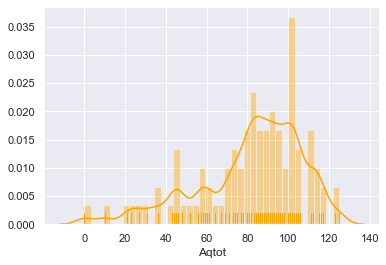

In [102]:
# Plot distribution
sns.distplot(df_behavioral['Aqtot'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqtot'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9259516000747681, 0.0)

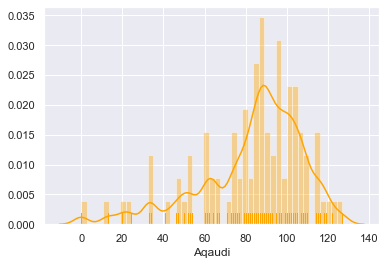

In [103]:
# Plot distribution
sns.distplot(df_behavioral['Aqaudi'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqaudi'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9170386791229248, 0.0)

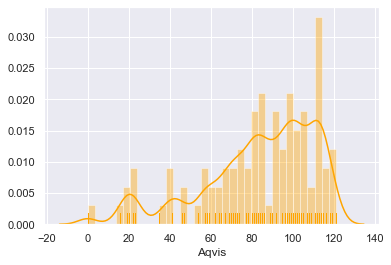

In [104]:
# Plot distribution
sns.distplot(df_behavioral['Aqvis'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqvis'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.984968900680542, 3.946410723092241e-27)

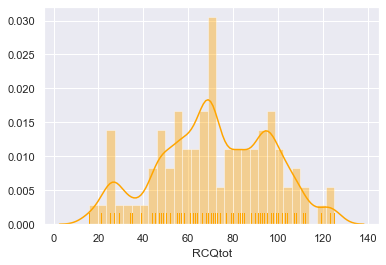

In [105]:
# Plot distribution
sns.distplot(df_behavioral['RCQtot'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQtot'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9925692677497864, 4.2215410715827533e-19)

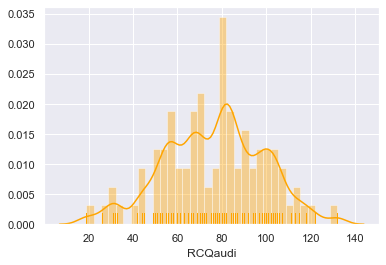

In [106]:
# Plot distribution
sns.distplot(df_behavioral['RCQaudi'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQaudi'])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.979030966758728, 1.898325692997441e-31)

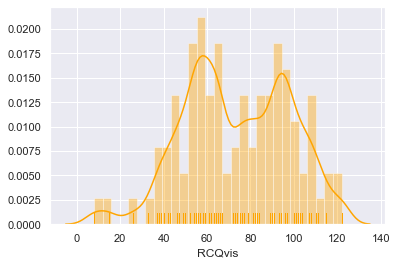

In [107]:
# Plot distribution
sns.distplot(df_behavioral['RCQvis'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQvis'])

#### The Attentionnal quotient (Aq) are not normally distributed, but the Response control quotient (RCQ) is. 
#### Finally, let's look at the eeg distribution, although it should not be normally distributed. Based on  general litterature, there should be increasingly higher power for lower wavebands

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.5810763835906982, 0.0)

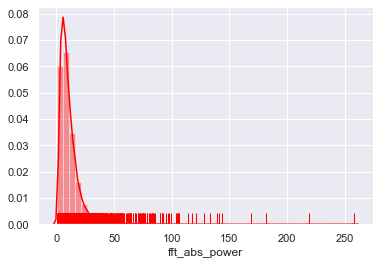

In [108]:
# Plot distribution
sns.distplot(df_eeg['fft_abs_power'], color='red', rug=True)
# Test data normality
stats.shapiro(df_eeg['fft_abs_power'])

#### In the case of eeg data, we are more interested in the mean amplitude of each waveband. 

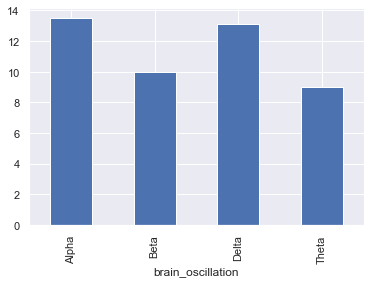

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

data = df_eeg
avg_abs_power = data.groupby('brain_oscillation')['fft_abs_power'].agg('mean')
avg_abs_power.plot(kind='bar')
plt.show()


#### Eeg data would be more interesting if we knew more about the waveband's mean absolute power for each electrode

In [110]:
# getting fft_abs_power for each waveband separately 

alpha1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Alpha']
alpha = alpha1[['electrode','fft_abs_power']]
beta1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Beta']
beta = beta1[['electrode','fft_abs_power']]
delta1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Delta']
delta = delta1[['electrode','fft_abs_power']]
theta1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Theta']
theta = theta1[['electrode','fft_abs_power']]

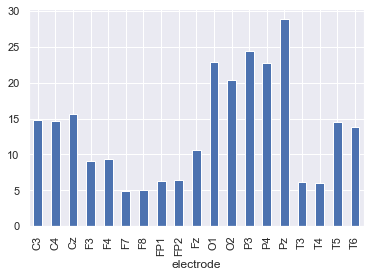

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

data = alpha
avg_abspow_by_electro_alpha = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_alpha.plot.bar()
plt.show()


#### As we can see; alpha waves are more importantly present at posterior electrodes (O1/O2, P3/P4, Pz).

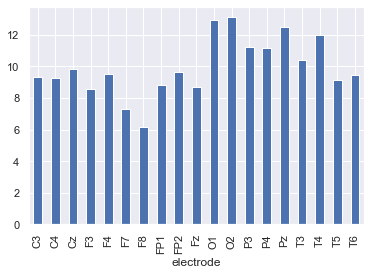

In [112]:
data = beta
avg_abspow_by_electro_beta = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_beta.plot.bar()
plt.show()

#### Beta waves seem to be a little bit more homogenously distributed, with more power on the back half on the brain.

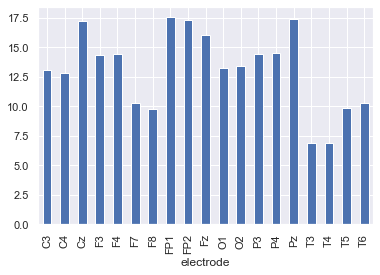

In [113]:
data = delta
avg_abspow_by_electro_delta = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_delta.plot.bar()
plt.show()

#### Delta waves seem to be more central and posterior

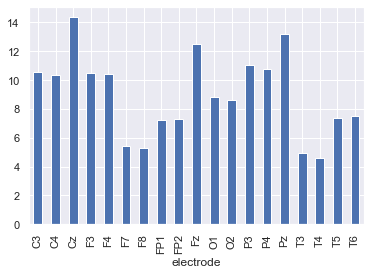

In [114]:
data = theta
avg_abspow_by_electro_theta = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro_theta.plot.bar()
plt.show()


### And finally, theta waves are also central and posterior

In [137]:

import plotly.express as px
df = df_eeg
fig = px.scatter(df, x="electrode", y="fft_abs_power", color="brain_oscillation", marginal_y="violin")
fig.show()

### We can also investigate the way the different features relate to each other

#### First, let's look at all the data. We can see that the behavioral data are highly correlated with each other, and that the cognitive data are somewhat correlated with each other. 

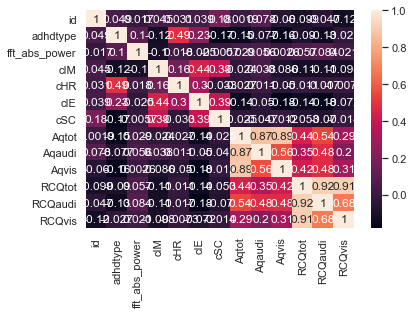

In [141]:
corrMatrix = df_analysis.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Now, we can look at those same variables, but grouped by oscillation group.

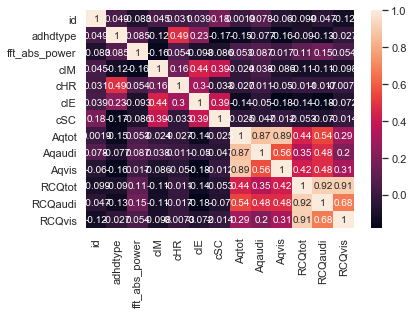

In [115]:
df_alpha = df_analysis.loc[df_analysis['brain_oscillation'] == 'Alpha']
corrMatrix = df_alpha.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


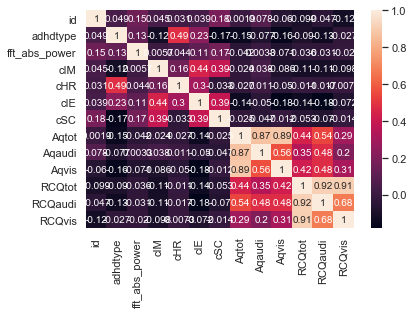

In [116]:
df_beta = df_analysis.loc[df_analysis['brain_oscillation'] == 'Beta']
corrMatrix = df_beta.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

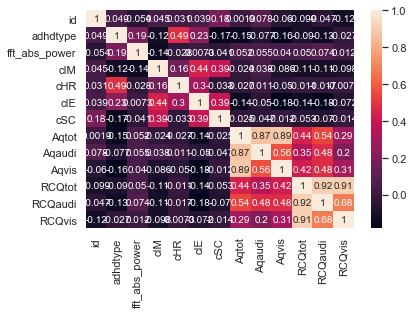

In [117]:
df_delta = df_analysis.loc[df_analysis['brain_oscillation'] == 'Delta']
corrMatrix = df_delta.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

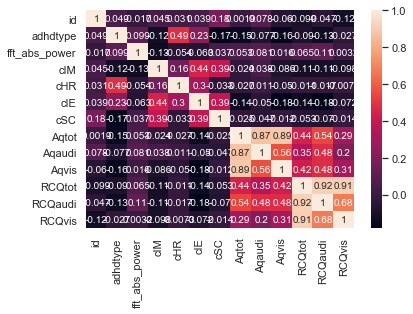

In [118]:
df_theta = df_analysis.loc[df_analysis['brain_oscillation'] == 'Theta']
corrMatrix = df_theta.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Visually, among all correlation matrices we can see that the behavioral data (Attentionnal quotient + Response control quotient) are strongly correlated together but correlated to the cognitive data (cIM - cSC). We can also see that the same is true for the cognitive data, to a lower extent.

### Let's look at the relationships between the behavioral data. As seen in the correlation matrices, most of them are correlated to each other.

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df_analysis
sns.set(color_codes=True)

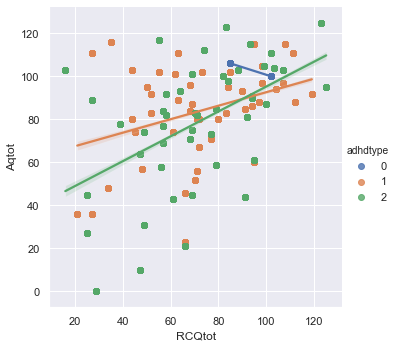

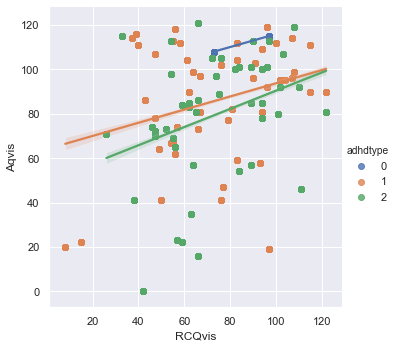

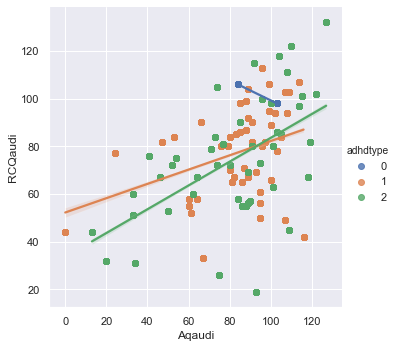

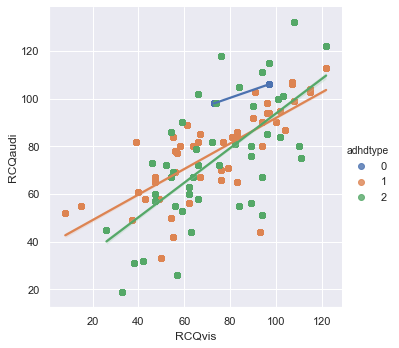

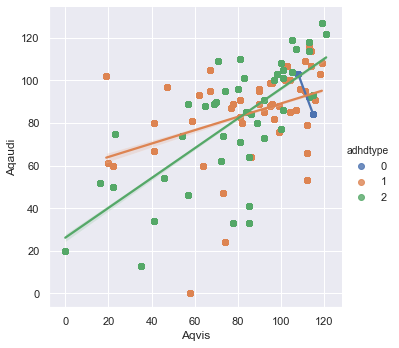

In [128]:
sns.lmplot(x="RCQtot", y="Aqtot", hue="adhdtype", data=df);
sns.lmplot(x="RCQvis", y="Aqvis", hue="adhdtype", data=df);
sns.lmplot(x="Aqaudi", y="RCQaudi", hue="adhdtype", data=df);
sns.lmplot(x="RCQvis", y="RCQaudi", hue="adhdtype", data=df);
sns.lmplot(x="Aqvis", y="Aqaudi", hue="adhdtype", data=df);

### Because it is composed of only 2 participants, the hyperactive adhd subtype cannot be analysed with the rest of the data. It can be visualized on the 5 previous graphs.

In [139]:
import plotly.express as px
df = df_analysis
fig = px.scatter_3d(df, x="Aqtot", y="Aqvis", z="Aqaudi", color="Gender", hover_name="adhdtype",
                   color_discrete_map = {"Aqtot": "blue", "Aqvis": "green", "Aqaudi":"red"})
fig.show()

In [130]:
import plotly.express as px
df = df_analysis
fig = px.scatter_3d(df, x="RCQtot", y="RCQvis", z="RCQaudi", color="Gender", hover_name="adhdtype",
                   color_discrete_map = {"RCQtot": "blue", "RCQvis": "green", "RCQaudi":"red"})
fig.show()

In [131]:
import plotly.express as px
df = df_analysis
fig = px.scatter_3d(df, x="cIM", y="cHR", z="cSC", color="Gender", hover_name="adhdtype")
fig.show()

In [140]:
import plotly.express as px
df = df_analysis
fig = px.scatter_3d(df, x="cIE", y="cHR", z="cSC", color="Gender", hover_name="adhdtype")
fig.show()

## this section is not finished. 
https://github.com/hyruuk/hytools/blob/master/hytools/meg_utils.py

In [133]:
def create_pval_mask(pvals, alpha=0.05):
    mask = np.zeros((len(pvals),), dtype='bool')
    for i, pval in enumerate(pvals):
        if pval <= alpha:
            mask[i] = True
    return mask

In [134]:
#The data we will need for create our topoplots are the mean fft absolute power for each electrode.
#the mean amplitude were computed in a previous section for graph plots of each electrodes amplitude
#There will be one topoplot for each frequency band. They will need to be called as toplot in the plotting function.
mean_alpha = np.asarray(avg_abspow_by_electro_alpha)
mean_beta = np.asarray(avg_abspow_by_electro_beta)
mean_delta = np.asarray(avg_abspow_by_electro_delta)
mean_theta = np.asarray(avg_abspow_by_electro_theta)


In [135]:
#corresponding electrodes in order are: C3, C4, Cz, F3, F4, F7, F8, FP1, FP2, Fz, O1, O2, P3, P4, Pz, T3, T4, T5, T6
ch_xy = np.array([[1, 2], [3, 2], [2, 2], [1, 3], [3, 3], [0, 3], [4, 3], [1, 4], [3, 4], [2, 3], [1, 0], [3, 0], 
                [1, 1], [3, 1], [2, 1], [0, 2], [4, 2], [0,1], [4, 1]])
ch_xy

array([[1, 2],
       [3, 2],
       [2, 2],
       [1, 3],
       [3, 3],
       [0, 3],
       [4, 3],
       [1, 4],
       [3, 4],
       [2, 3],
       [1, 0],
       [3, 0],
       [1, 1],
       [3, 1],
       [2, 1],
       [0, 2],
       [4, 2],
       [0, 1],
       [4, 1]])

In [136]:
from mne.io import read_raw_ctf
import os
import matplotlib
import mne
import numpy as np
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
import time
from IPython.display import clear_output
from brainpipe import feature
import mne
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
def array_topoplot(toplot, ch_xy, showtitle=False, titles=None, savefig=False, figpath=None, vmin=-1, vmax=1, cmap='magma', with_mask=False, masks=None, show=True):
    #create fig
    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=5)
    fig, ax = plt.subplots(1,len(toplot), figsize=(20,10))
    for i, data in enumerate(toplot):
        if with_mask == False:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, extrapolate='box', outlines='head')
        elif with_mask == True:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, mask_params=mask_params, mask=masks[i], extrapolate='box', outlines='head')
        #option for title
        if showtitle == True:
            ax[i].set_title(titles[i], fontdict={'fontsize': 20, 'fontweight': 'heavy'})
    #add a colorbar at the end of the line (weird trick from https://www.martinos.org/mne/stable/auto_tutorials/stats-sensor-space/plot_stats_spatio_temporal_cluster_sensors.html#sphx-glr-auto-tutorials-stats-sensor-space-plot-stats-spatio-temporal-cluster-sensors-py)
    divider = make_axes_locatable(ax[-1])
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_colorbar.tick_params(labelsize=14)
    #save plot if specified
    if savefig == True:
        plt.savefig(figpath, dpi=300)
    if show == True:
        plt.show()
        plt.close(fig=fig)
    else:
        plt.close(fig=fig)
    return fig



ModuleNotFoundError: No module named 'brainpipe.feature.utils'

In [ ]:
array_topoplot(mean_alpha, ch_xy)